# Chapter3 보조 자료 

## 자동차 연비 예측하기: 회귀 
1. 데이터셋 불러오기 

In [5]:
# 산점도 행렬을 그리기 위해 seaborn 패키지를 설치합니다
!pip install seaborn
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2.8.2


In [2]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

40960/30286 [========================================] - 0s 1us/step


'/root/.keras/datasets/auto-mpg.data'

In [3]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset = dataset.dropna()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [ ]:
# MPG = 연비, Cylinders = 실린더 개수, Displacement = 배기량, Horseposer = 마력, Weight = 중량, Acceleration = 가속

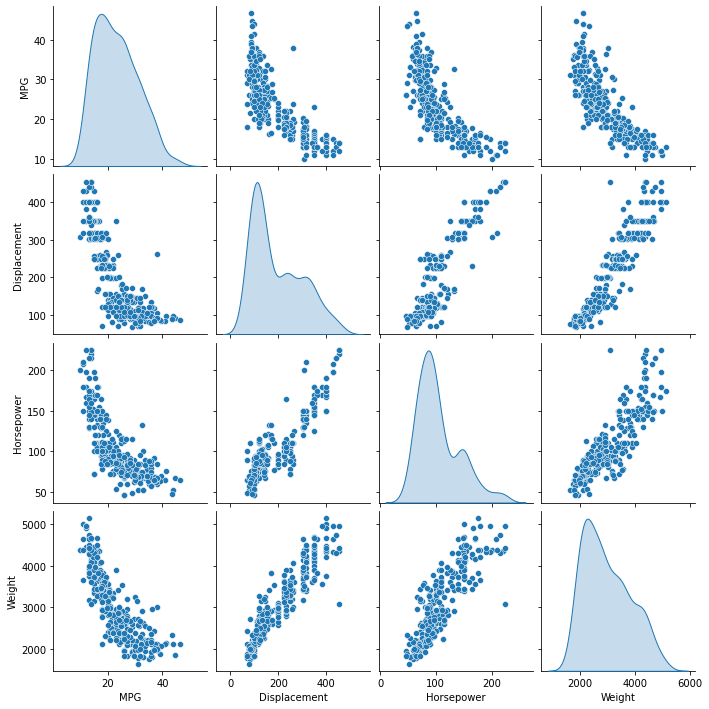

In [7]:
np.random.seed(999)
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)
sns.pairplot(train_dataset[["MPG", "Displacement", "Horsepower", "Weight"]], diag_kind="kde")

In [9]:
# train set에서 연비(mpg)) - 배기량(displacement), 무게(weight) - 마력(horsepower) 간의 회귀분석을 수행하여 최적의 직선을 찾고 testset의 샘플로 연비로 배기량을, 무게로 마력을 예측하시오.

In [8]:
mpg_train = train_dataset["MPG"]
displacement_train = train_dataset["Displacement"]
weight_train = train_dataset["Weight"]
horsepower_train = train_dataset["Horsepower"]

mpg_test = test_dataset["MPG"]
displacement_test = test_dataset["Displacement"]
weight_test = test_dataset["Weight"]
horsepower_test = test_dataset["Horsepower"]

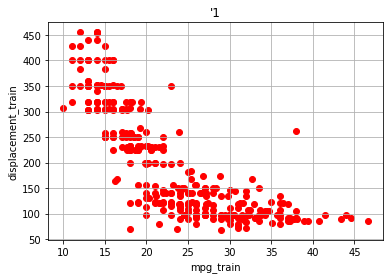

In [10]:
plt.scatter(mpg_train, displacement_train, marker="o", color='r')
plt.grid()
plt.xlabel("mpg_train")
plt.ylabel("displacement_train")
plt.title("'1")
plt.show()

-11.821235686373747 442.6319557681924


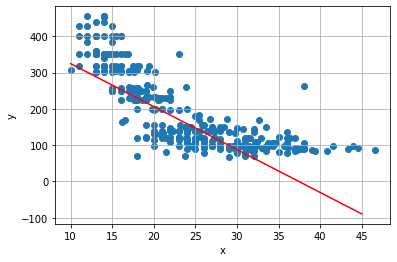

nan nan


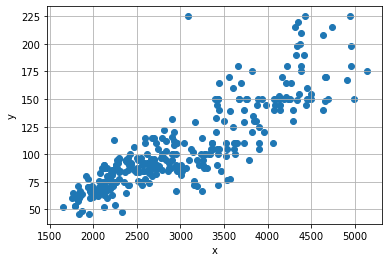

In [24]:
w = 1
b = 1

x = mpg_train 
y = displacement_train

for i in range(1000):
  for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i 
    w = w + w_rate * err * 0.001
    b = b + 1 * err * 0.001

print(w, b)
plt.scatter(x, y)
pt1 = (10, 10 * w + b)
pt2 = (45, 45 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()



0.03628055811646844 0.9531455114199447


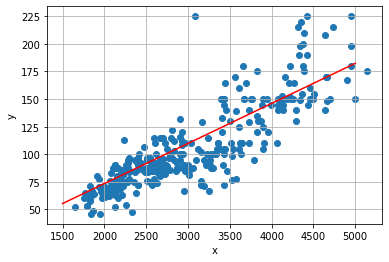

In [31]:

w = 1
b = 1

x = weight_train
y = horsepower_train

for i in range(1000):
  for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i 
    w = w + w_rate * err * 0.0000001
    b = b + 1 * err * 0.0000001
    # print(w ,b)
    # input()
  

print(w, b)
plt.scatter(x, y)
pt1 = (1500, 1500 * w + b)
pt2 = (5000, 5000 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()




In [42]:
class LinearReg:
    def __init__(self):
      self.w = 1
      self.b = 1

    def forpass(self, x):
      y_hat= x * self.w + self.b
      return y_hat

    def backprop(self, x, err):
      w_grad = x * err * 0.0000001
      b_grad = 1 * err * 0.0000001
      return w_grad, b_grad

    def fit(self, x, y, epochs=100):
      for i in range(epochs):
        for x_i, y_i in zip(x,y):
          y_hat = self.forpass(x_i)
          err=-(y_i - y_hat)
          w_grad, b_grad = self.backprop(x_i,err)
          self.w-=w_grad
          self.b-=b_grad

In [43]:
linreg = LinearReg()

linreg.fit(x, y, 1000)

0.03628055811646844 0.9531455114199447


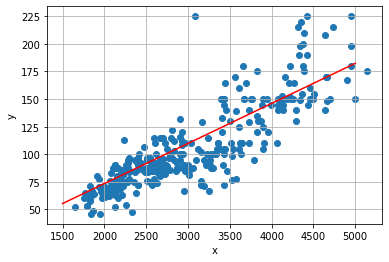

In [44]:
w = linreg.w
b = linreg.b

x = weight_train
y = horsepower_train

# for i in range(1000):
#   for x_i, y_i in zip(x, y):
#     y_hat = x_i * w + b
#     err = y_i - y_hat
#     w_rate = x_i 
#     w = w + w_rate * err * 0.0000001
#     b = b + 1 * err * 0.0000001
#     # print(w ,b)
#     # input()
  

print(w, b)
plt.scatter(x, y)
pt1 = (1500, 1500 * w + b)
pt2 = (5000, 5000 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()
